In [37]:
import requests
import io
import xml.etree.ElementTree as ET
import pandas as pd

In [176]:
datapoint = "http://datapoint.metoffice.gov.uk/public/data/"
resource = "val/wxfcs/all/datatype/sitelist"
key = "YOUR-API-KEY"
df_cols = ["elevation", "id", "latitude", "longitude", "name", "region", "unitaryAuthArea"]

In [122]:
def url_constructor(datapoint, resource, key):
    url = datapoint + resource + "?key=" +  key
    return url

In [123]:
xml_url = url_constructor(datapoint, resource, key)

In [124]:
def xml_parser(xml_url):
    response = requests.get(xml_url)
    xtree = ET.fromstring(response.text) #create an ElementTree object
    xroot= etree.getroot()

In [131]:
def xml_to_dataframes(xroot, df_cols):
    data_object = {}
    data_list = []
    
    # Loop over column names
    for col_nam in df_cols:
        
        # Loop over xml and append all data into a list
        attrib_list = [ls.attrib.get(col_nam) for ls in xroot]
        
        # Assign the list as value to the object key
        data_object[col_nam] = attrib_list

    # Return a pandas dataframe using the object
    return pd.DataFrame(data_object)

In [133]:
sitelist = xml_to_dataframes(xroot, df_cols)

In [135]:
sitelist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6002 entries, 0 to 6001
Data columns (total 7 columns):
elevation          6001 non-null object
id                 6002 non-null object
latitude           6002 non-null object
longitude          6002 non-null object
name               6002 non-null object
region             5996 non-null object
unitaryAuthArea    5980 non-null object
dtypes: object(7)
memory usage: 328.3+ KB


In [136]:
sitelist.tail()

,elevation,id,latitude,longitude,name,region,unitaryAuthArea
5997,167.0,355886,50.38299,-4.88352,St Dennis,sw,Cornwall
5998,108.0,355874,52.415775,-4.059387,Penglais School,wl,Ceredigion
5999,75.0,3930,51.55138,-2.55933,Almondsbury,sw,South Gloucestershire
6000,633.0,355879,53.065277,-4.1625,Grib Nantlle (Nantlle Ridge) Y Garn,wl,Gwynedd
6001,35.0,355998,50.73862,-2.90325,Charmouth,sw,Dorset


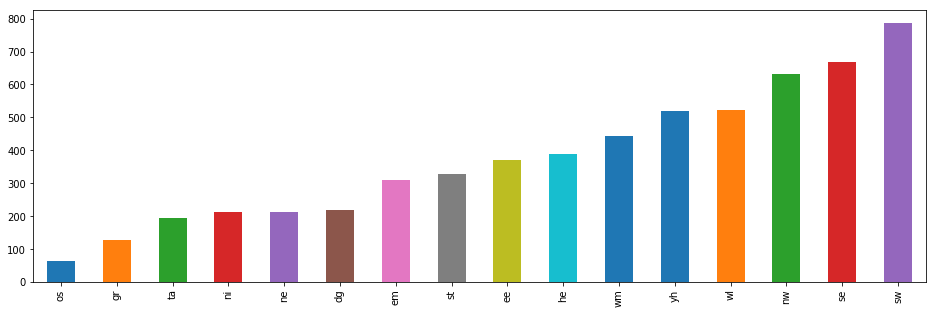

In [170]:
sitelist.region.value_counts().sort_values().plot(kind = "bar", figsize=(16, 5))

In [175]:
sitelist[sitelist.name == "Woking"]

,elevation,id,latitude,longitude,name,region,unitaryAuthArea
118,37.0,324239,51.3156,-0.5594,Woking,se,Surrey
